---
title: "Correlation of Enformer CAGE predictions and observed expression across all rn7 genes"
author: "Sabrina Mi"
description: "We calculated correlation of 0.45 between Enformer predictions on rn7 reference genome and average gene expression in the Brain study."
date: "8/15/23"
---

Our goal is to test whether Enformer can determine relative gene expression levels in rat Brain tissues. We used mean gene expression in Br rats as the ground truth, and predicted the CAGE Brain track at each gene's TSS. We found a correlation of 0.45, which we still need to compare to the same experiment with human data to determine whether this is high or low.

## Reference Genome

### Read in expression files

In [1]:
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tpm = pd.read_csv("/home/s1mi/enformer_rat_data/expression_data/Brain.rn7.expr.tpm.bed", sep="\t", header=0, index_col='gene_id')
tpm.head()

### Calculate average gene expression

In [8]:
mean_tpm = tpm.iloc[:,3:].mean(axis=1)
print(mean_tpm)

gene_id
ENSRNOG00000065394    0.000000
ENSRNOG00000065356    0.000000
ENSRNOG00000070568    0.000912
ENSRNOG00000065706    0.005029
ENSRNOG00000069644    0.000265
                        ...   
ENSRNOG00000067420    0.000000
ENSRNOG00000069298    0.000559
ENSRNOG00000066131    0.000529
ENSRNOG00000068239    0.000500
ENSRNOG00000069552    0.001088
Length: 30231, dtype: float64


In [9]:
mean_iqn = iqn.iloc[:,3:].mean(axis=1)
print(mean_iqn)

gene_id
ENSRNOG00000065394    0.000000
ENSRNOG00000065356    0.000000
ENSRNOG00000070568    0.052617
ENSRNOG00000065706    0.022574
ENSRNOG00000069644    0.011569
                        ...   
ENSRNOG00000067420    0.000000
ENSRNOG00000069298    0.004439
ENSRNOG00000066131    0.008208
ENSRNOG00000068239    0.004439
ENSRNOG00000069552    0.017464
Length: 30231, dtype: float64


In [30]:
## Put both means into dataframe
corr_df = pd.DataFrame({'tpm': mean_tpm, 'iqn': mean_iqn, 'predicted': np.full(30231, np.nan), 'chr': np.full(30231, np.nan)})
corr_df.head()

,tpm,iqn,predicted,chr
gene_id,,,,
ENSRNOG00000065394,0.000000,0.000000,NaN,NaN
ENSRNOG00000065356,0.000000,0.000000,NaN,NaN
ENSRNOG00000070568,0.000912,0.052617,NaN,NaN
ENSRNOG00000065706,0.005029,0.022574,NaN,NaN
ENSRNOG00000069644,0.000265,0.011569,NaN,NaN


### Calculate gene expression from Enformer predictions on reference genome

In [11]:
reference_predictions="/home/s1mi/Br_predictions/predictions_folder/reference_Br_all_genes/predictions_2023-08-11/enformer_predictions/reference_Br/haplotype0"

annot_df = pd.read_csv('/home/s1mi/enformer_rat_data/annotation/rn7.gene.txt', sep ='\t',  index_col='geneId')
annot_df.head(3)

/tmp/ipykernel_36254/3273646084.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  annot_df = pd.read_csv('/home/s1mi/enformer_rat_data/annotation/rn7.gene.txt', sep ='\t',  index_col='geneId')


,geneSymbol,chromosome,start,end,strand,tss,description,hasEqtl,expr_BLA,expr_Brain,...,sqtl_BLA,sqtl_Brain,sqtl_Eye,sqtl_IL,sqtl_LHb,sqtl_NAcc,sqtl_NAcc2,sqtl_OFC,sqtl_PL,sqtl_PL2
geneId,,,,,,,,,,,,,,,,,,,,,
ENSRNOG00000066169,ENSRNOG00000066169,1,36112690,36122387,-,36122387,NaN,True,True,True,...,False,False,False,False,False,False,False,False,False,False
ENSRNOG00000070168,Olr56,1,157231467,157232417,+,157231467,olfactory receptor family 51 subfamily F membe...,True,False,True,...,False,False,False,False,False,False,False,False,False,False
ENSRNOG00000070901,Irgq,1,80123925,80131881,+,80123925,immunity-related GTPase Q,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [3]:
# for gene in corr_df.index:
#     gene_annot = annot_df.loc[gene]
#     corr_df['chr'].loc[gene] = gene_annot['chromosome']
#     interval = f"chr{gene_annot['chromosome']}_{gene_annot['tss']}_{gene_annot['tss']}"
#     path = os.path.join(predictions_dir, f"{interval}_predictions.h5")
#     if os.path.isfile(path):
#         predictions = h5py.File(path, "r")
#         pred_expr = np.average(predictions[interval][446:450, 4980])
#         corr_df['predicted'].loc[gene] = pred_expr
#     else:
#         continue


# corr_df.dropna().to_csv("reference_epigenome_predicted_vs_observed.csv", index=True)

corr_df = pd.read_csv("reference_epigenome_predicted_vs_observed.csv", header = 0, index_col = 'gene_id')
print(corr_df)

                         tpm  predicted  chr
gene_id                                     
ENSRNOG00000065394  0.000000   0.002946  1.0
ENSRNOG00000065356  0.000000   0.004051  1.0
ENSRNOG00000070568  0.000912   0.003553  1.0
ENSRNOG00000065706  0.005029   0.005847  1.0
ENSRNOG00000069644  0.000265   0.001334  1.0
...                      ...        ...  ...
ENSRNOG00000067420  0.000000   0.001928    Y
ENSRNOG00000069298  0.000559   0.003280    Y
ENSRNOG00000066131  0.000529   0.003569    Y
ENSRNOG00000068239  0.000500   0.001887    Y
ENSRNOG00000069552  0.001088   0.001822    Y

[19493 rows x 3 columns]


I ran Enformer on roughly ~30,000 intervals, but it looks like we only have predictions for 2/3 of them. I'll investigate in another post.

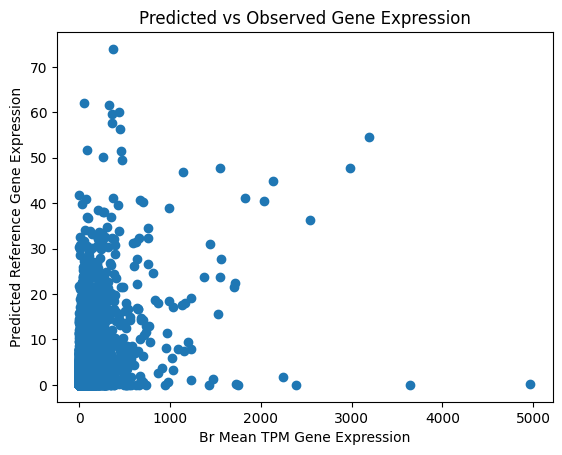

In [4]:
# Drop rows with NaN values
corr_df = corr_df.dropna()

# Create a scatter plot with colors based on column z
plt.scatter(corr_df['tpm'], corr_df['predicted'])

# Set labels and title
plt.xlabel('Br Mean TPM Gene Expression')
plt.ylabel('Predicted Rat Reference Gene Expression')
plt.title('Predicted vs Observed Gene Expression')

# Show the plot
plt.show()


In [7]:
corr_df[['tpm', 'predicted']].corr()

,tpm,predicted
tpm,1.000000,0.433632
predicted,0.433632,1.000000


The correlation between CAGE predictions and gene expression measured by relative abundance of transcripts is lower than we wanted. We'll compare it with average gene expression in human brain tissue. 

In [ ]:
gtex_tpm = pd.read_csv("gene_tpm_2017-06-05_v8_brain_cortex.gct.gz", header=2, sep="\t")
gtex_tpm.head()

Lastly, we'll concatenate all the prediction matrices into one h5 file.

## Concatenate Predictions

In [20]:
def concatenate_predictions(predictions_dir, output_path):
    with h5py.File(output_path, "w") as output_file:
        files = os.listdir(predictions_dir)
        for file in files:
            interval = file.replace("_predictions.h5", "")
            with h5py.File(os.path.join(predictions_dir, file), "r") as input_file:
                output_file.create_dataset(interval, data=input_file[interval][()], shape=(896,5313))

In [21]:
concatenate_predictions(reference_predictions, "/home/s1mi/Br_predictions/2023-08-16_predictions_some_missing_genes.h5")